## **Objects in Python**
This is the last notebook on object-oriented programming in Python. The subject of this notebook is the object, you might think this is a bit odd, after all objects have been the focus of all the notebooks. Though this is true our discussions on objects have been superficial, the object is the very core of Python as a programming language. Literally everything is an object in Python, and everything is a subclass of object. 

Quite often you will see that relation being made explicit by a line of code like this.

`class ExampleOne(object):` 

Meaning that this class Example has no other superclass than object itself. I call this Google style, for I seem to recollect that at one time it stated in the Google Python style guide it was said to make this relationship explicit. I can't find it the current style guide so I might be wrong. However, using a style guide and a linter is a good idea, and why not use Google's style guide. See https://google.github.io/styleguide/pyguide.html.

Pylint is an example of a linter, pylint will give you advice on style and substance, make your code both less prone to bugs and much more readable for fellow programmers.

The object is always the root of the directed acyclic graph that is the Python object hierarchy. 

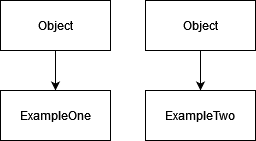

All object-oriented programming languages have objects, hence the name of course. An object is not much more than an allocated space in memory (on the heap), it has identification, a human readable name, it would be difficult to identify an object by its memory address. And it has a structure, a way an object is put together. The Python object is a mix of a C++ struct and a modula3 object. 


## **class objects & instance objects** 

A Python object comes in two flavours:

 1. class object
 2. instance object
 
The first is the class object, the class object has two roles:

 1. to function as blueprint of all objects belonging to this class. 
 2. The second role is to create objects of this class. 
 
For the first role class defines & names attribute references, in doing so it creates the namespace of the object. A namespace is a set of signs (names) that are used to identify and refer to the attributes the object has. The use of the namespace is that it ensures names can reused over multiple objects, iff the object identifiers are unique. We can access the attributes by using the object identifier and the name. 

`ExampleOne. Variable` & `ExampleTwo.variable`

Python class objects have three types of attributes:

 1. Instance variables (confusingly so perhaps, these are mostly referred to as attributes in OO-speak)
 2. Class variables
 3. Methods

Methods we can further subdivide in:
 * regular methods
 * class methods
 * static methods
 
Python also knows an abstract method but that belongs to the abc module not the class object itself.

Let's see a class object.


In [43]:
class ExampleOne:
    '''an example class we can inspect.'''
    classvar:int = 1
    
    def __init__(self, nr:int, text:str)->None:
        self.nr = nr
        self.text = text
        


It is important to understand that a class object functions as a blueprint for all objects of this class. 

The other goal of the class object is to instantiate the object, that is to create it in memory with a unique identifier and the instance variables being assigned a value.

The difference between an class object and an instance object is that the latter only lives in memory. If the computer is off, the object does not exist. This in contrast to the class object that lives in program code stored on some sort of medium. 

In [45]:
one = ExampleOne(nr=7, text='This is an instance object')

The first step is a call to a special method named `__new__`, this will create a new object with a memory address 

The return value of new is an object an instance object of its class

We can inspect that our object has a memory location via the `id()` function.

In [7]:
id(one)

2727377575056

In [44]:
help(ExampleOne)

Help on class ExampleOne in module __main__:

class ExampleOne(builtins.object)
 |  ExampleOne(nr: int, text: str) -> None
 |  
 |  an example class we can inspect.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, nr: int, text: str) -> None
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __annotations__ = {'classvar': <class 'int'>}
 |  
 |  classvar = 1



Python has an excellent help function that is I feel often under used. 

The help function tells us most of what we want to know about a class object.

 * line 1: class ExampleOne(builtins.object) - tells us that ExampleOne has no super classes other than object, object is the superclass to all other objects, it is the object that Python built-in.
 * line 2: ExampleOne(nr: int, text: str) -> None - This is the code we need to execute to create the object, this will call the static method `__new__`. The astute observer will have noticed we do not define that method, we inherit it from builtins.object.
 * line 3: an example class we can inspect - The message the author wants to give the user of the class, it makes the intent of the class clear. You should read the Google style guide for how to properly comment on your code.
 * line 4: Methods defined here: - names the methods we have defined for our class object
 * line 5: `__init__(self, nr: int, text: str) -> None` - initialize self, the object
 * line 6:  Data descriptors defined here: - similar to line 4 but instead of naming the methods defined in our class objects, it names the data descriptors we have defined here. For now, it is only important to remember that the instance variables are kept in a dictionary, one that can be called on with the name `__dict__`. I will show you how to do that in a moment and will discuss data descriptors in depth later in this notebook.
 * line 7: We are going to skip weak references here. I will quickly explain them at the end of this notebook.
 * line 8: Data and other attributes defined here: - functions similar to line four and six, but now it refers to the other data, such as the class variable we have named, including the value, see line 10. And a dict giving the annotations we have used for our class variable, see line 9.

All this information we have received from help. There is more to help but we will see that later. For now you should understand that you can use this information in your programming. We can access the instance variables of any object by calling its dict.


In [46]:
one.__dict__

{'nr': 7, 'text': 'This is an instance object'}

We can change the value of attributes by accessing the dictionary directly. 

This might seem like something you should not do, but if you become experienced in Python this is probably something you want to do. I will some uses of this later, when we move into descriptors.

In [49]:
one.__dict__['text'] = 'This is a very different example'
one.__dict__['text']

'This is a very different example'

In [50]:
one.__annotations__

{'classvar': int}

In [14]:
one.classvar

1

In [52]:
class ExampleTwo:
    '''This is an example class with given instantiation values'''
    
    def __init__(self)->None:
        self.number = 5
        self.txt = 'Second a silver lining'
        
    def __repr__(self)->str:
        return f'{self.__class__.__name__} has two data attributes: {self.number} & {self.txt}'
    
    def __str__(self)->str:
        return f'This is a very different object'
    
    def text(self):
        return self.txt

In [53]:
snd = ExampleTwo()

#### **instance object** 
`snd`is the second flavour of objects Python has, it is the object instance. The instance object can really only do one thing, it can do attribute references.

There are two types of attribute references, method references and data references.

Let me begin by calling help to see what is all in there, and what is not.

In [54]:
help(type(snd))

Help on class ExampleTwo in module __main__:

class ExampleTwo(builtins.object)
 |  ExampleTwo() -> None
 |  
 |  This is an example class with given instantiation values
 |  
 |  Methods defined here:
 |  
 |  __init__(self) -> None
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self) -> str
 |      Return repr(self).
 |  
 |  __str__(self) -> str
 |      Return str(self).
 |  
 |  text(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



As you can see there are four methods defined in the class object.

There are data descriptors, they will be given a standard start value at initialization.

There are no other data, no annotations nothing.

`snd` can only do attribute reference, meaning I can call the instance attributes

In [55]:
snd.number

5

In [56]:
snd.txt

'Second a silver lining'

and I can call the methods

In [57]:
print(snd)

This is a very different object


In [58]:
snd

ExampleTwo has two data attributes: 5 & Second a silver lining

In [59]:
snd.text()

'Second a silver lining'

If we inspect the code of `__repr__` a bit closer we see that I call `self.__class__.__name__` in the format string. 

Consider that line of code, apperently there are more attributes

In [29]:
snd.__class__

__main__.ExampleTwo

In [30]:
snd.__class__.__name__

'ExampleTwo'

Of course this is circular it is akin to:

In [31]:
type(snd)

__main__.ExampleTwo

In [32]:
type(snd).__name__

'ExampleTwo'

To understand where this comes from we would have to look back at `object`.

`object` comes with a host of method attributes, we have already seen two: `__new__` and `__init__` but it has quite a few more, too many for me to list. You should look at the Python data model to see all of them and how to use them for effective Python programming. https://docs.python.org/3/reference/datamodel.html#special-method-names 

In this notebook I can only show you a few of them ones that allow you to do surprising things in Python. 

Though you inherit all these methods, after all everything is a subclass of `object`, however not these methods are implemented. 

`object` comes with data attributes, one of them is `__name__`, again all other classes inherit `__name__` from `object`


In [38]:
object.__name__

'object'

We can see all the methods defined if we call on help

In [37]:
help(object)

Help on class object in module builtins:

class object
 |  The base class of the class hierarchy.
 |  
 |  When called, it accepts no arguments and returns a new featureless
 |  instance that has no instance attributes and cannot be given any.
 |  
 |  Built-in subclasses:
 |      anext_awaitable
 |      ArgNotFound
 |      async_generator
 |      async_generator_asend
 |      ... and 116 other subclasses
 |  
 |  Methods defined here:
 |  
 |  __delattr__(self, name, /)
 |      Implement delattr(self, name).
 |  
 |  __dir__(self, /)
 |      Default dir() implementation.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __format__(self, format_spec, /)
 |      Default object formatter.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getstate__(self, /)
 |      Helper for pickle.
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |  

Most of these I am not going to discuss here, for they have very specific roles in Python.

Those that I want to discuss are:

 * `__new__`
 * `__init__`
 * `__del__`

These control the basic operations of an object, creation and deletion. I have discussed the first two, (there is more to know) but haven't really discussed `__del__` which is called when we want the instance object to be destroyed.`

In [60]:
id(snd)

2727377809488

In [61]:
del(snd)

In [62]:
id(snd)

NameError: name 'snd' is not defined